## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [3]:
X.shape

(178, 13)

**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [4]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

- В данных нет пропусков

- Проверим все ли столбцы являются колличественными 

In [5]:
print(f'Колличественных столбов: {X._get_numeric_data().shape[1]}, Столбов всего: {X.shape[1]}')

Колличественных столбов: 13, Столбов всего: 13


In [6]:
X.select_dtypes(include=['category', 'object'])

""
0
1
2
3
4
...
173
174
175
176


- Категориальных переменных нет

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [3]:
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

- Проводим масштабирование с помощью StandardScaler. Оно происходит по формуле: z=(x-u)/s, где x - наши данные, u - среднее по данным, s - стандартноее отклонение

In [5]:
#Игонорируем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [6]:
# датасет с результатами
results = pd.DataFrame(columns = ["NN", "Train", "Test"])

In [7]:
scaler = StandardScaler().fit(X_train[['alcohol', 'magnesium']])
X_scaler_train = scaler.transform(X_train[['alcohol', 'magnesium']])
X_scaler_test = scaler.transform(X_test[['alcohol', 'magnesium']])

In [8]:
i=0
config=[]
for k in [1, 3, 5, 10, 15, 25]:
    clf = KNeighborsClassifier(n_neighbors=k, p=2)
    config.append(clf)
    clf.fit(X_scaler_train, y_train)
    
    y_predicted = clf.predict(X_scaler_train)
    Train=round(np.mean(y_train == y_predicted), 2)
    y_predicted = clf.predict(X_scaler_test)
    Test=round(np.mean(y_test == y_predicted), 2)
    
    results.loc[i,"NN"] = k
    results.loc[i,"Train"] = Train
    results.loc[i,"Test"] = Test
    i+=1

In [9]:
results.head(6)

,NN,Train,Test
0,1,1.0,0.67
1,3,0.81,0.78
2,5,0.75,0.72
3,10,0.73,0.78
4,15,0.73,0.8
5,25,0.67,0.8


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [186]:
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.8 MB/s eta 0:00:00a 0:00:010m


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [14]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

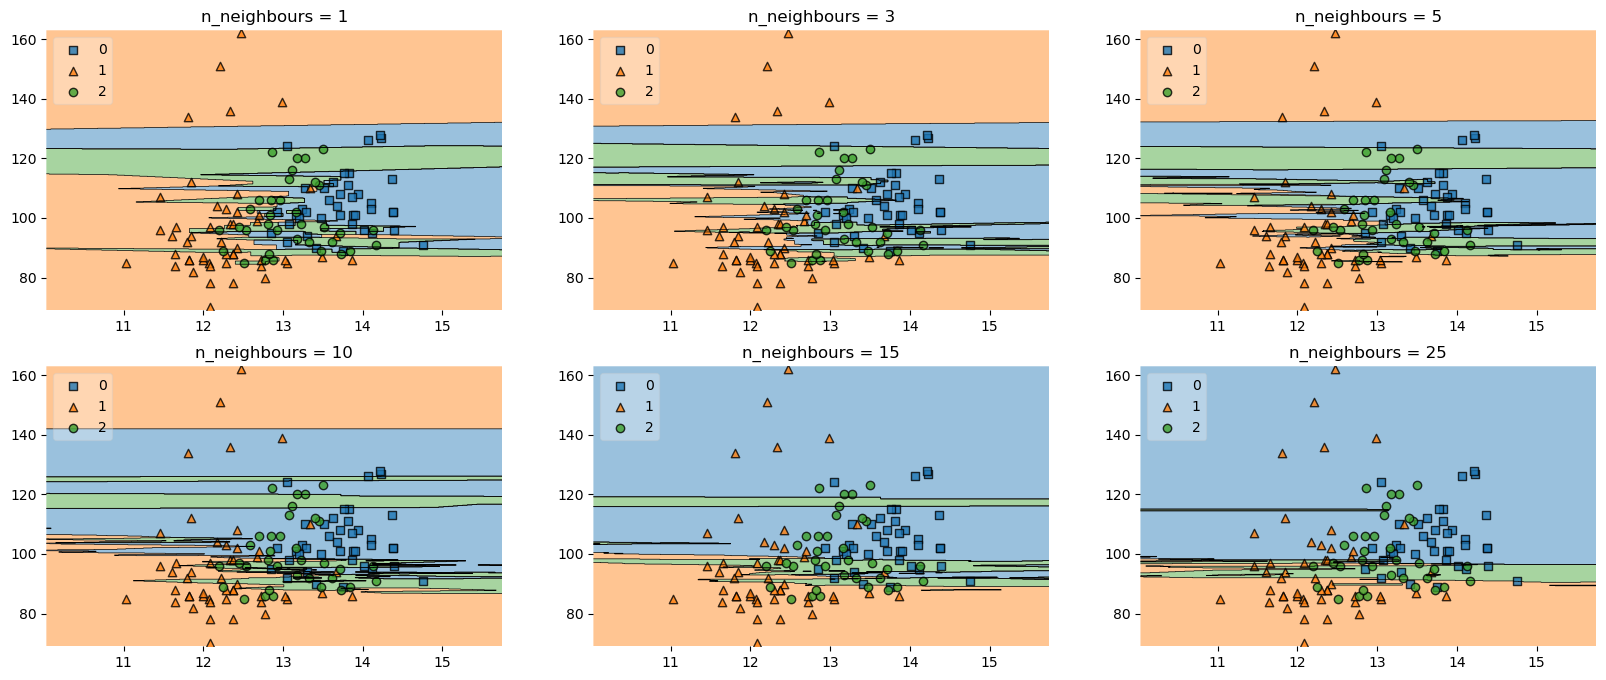

In [11]:
x=X_train[['alcohol', 'magnesium']].to_numpy()
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)
np.random.seed(0)
fig = plt.figure(figsize=(20,8))

lab = [f'n_neighbours = {i}' for i in [1,3,5,10,15,25]]
for i,clf in enumerate(config):
    clf.fit(x, y_train)
    ax = plt.subplot(gs[i//3, i%3])
    fig = plot_decision_regions(x, y_train, clf=clf, legend=2)
    plt.title(lab[i])
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

#### Вывод:
Самое оптимальное число выбора соседей, для обучения классификатора явлется 3. Так как доля верных ответов на тестовой выборке составила 0.78, причем если взять большее число соседей, как например 15 или 25, можно добиться доли верных отвтеов на 0.02 больше. Но скорость обработки и вычисления будет значительно падать на большом количестве данных, а 0.02 незначительный прирост, поэтому k=3, является оптимальным количеством соседей. Так же это можно увидеть на графиках. При n_neighbours = 3 ситуация выглядит более хорешей чем при n_neighbours = 15 и n_neighbours = 25

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

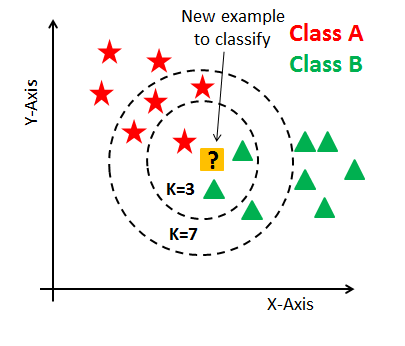

In [12]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    
    def predict(self, X):
        r=[]
        q=[]
        y_test=[]
        for i in range(0, len(X)):
            for j in range(0, len(self.X_train)):
                f=np.linalg.norm(X[i] - self.X_train[j])
                q.append([f, j])
                q.sort(key = lambda x: x[0])
                q=q[0:self.k]
            print(q)
            for l in q:
                r.append(self.y_train[l[1]])
            print(r, r.count(1), r.count(0))
            y_test.append(1) if r.count(1)>r.count(0) else y_test.append(0)
            q.clear()
            r.clear()
        return(np.array(y_test))

In [3]:
knn = KNN(k=3)
X_train =  np.array([[1, 1], [2, 2],[3, 2]])
y_train =  np.array([0, 1, 1])
X_test =  np.array([[1.5, 1.5]])
knn.fit(X_train, y_train)
knn.predict(X_test)

NameError: name 'KNN' is not defined

In [2]:
y_train

NameError: name 'y_train' is not defined

In [706]:
# Не меняйте файл!
def test_knn(KNN):
    knn = KNN(k=1)
    X_train =  np.array([[1, 1], [2, 2]])
    y_train =  np.array([0, 1])
    X_test =  np.array([[1.5, 1.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [0]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[9.5, 9.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[5.5, 5.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[15, 15]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[5, 5], [2, 2]])
    knn.fit(X_train, y_train)
    assert all(knn.predict(X_test) == [1, 0])

In [707]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [804]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [805]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

- В данных нет пропусков

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

- Удалим столб Unnamed: 0, так как он дублирует id

In [806]:
data=data.drop(columns=['Unnamed: 0'])
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [807]:
dataCorr=data.corr()
dataCorr=dataCorr['price']
dataCorr.sort_values(ascending=False)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

- Больше всего цена зависит от веса брильянта (в каратах), потом то длины (признак Х), далее от ширины (признак Y) и от высоты (признак Z)

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [808]:
dataH = pd.get_dummies(data)
dataH

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [809]:
y=dataH['price']
y=y.to_numpy()

dataH=dataH.drop(columns=['price'])

In [810]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(dataH, y, test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [811]:
scaler = StandardScaler().fit(X_train)
X_scaler_train = scaler.transform(X_train)
X_scaler_test = scaler.transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [812]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression().fit(X_train, y_train)
print(f"Train MSE: {mean_squared_error(y_train, lr.predict(X_train))}")
print(f"Test MSE: {mean_squared_error(y_test, lr.predict(X_test))}")
LinMSEtest=mean_squared_error(y_test, lr.predict(X_test))

Train MSE: 1284661.8621191257
Test MSE: 1259159.1137946646


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [813]:
p=lr.coef_
p=p.astype(int)
dfCoefs = pd.DataFrame(columns=['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair' ,'cut_Good', 'cut_Idea', 'cut_Premium', 
                               'cut_Very Good', 'color_D' ,'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
                               'clarity_I1' ,'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
                               'clarity_VVS2'])
dfCoefs.loc[len(dfCoefs)]=p
dfCoefs.squeeze().sort_values(ascending=False)

carat            11119
clarity_IF        1515
clarity_VVS1      1203
clarity_VVS2      1136
color_D            797
clarity_VS1        774
color_E            617
color_F            560
clarity_VS2        454
color_G            347
cut_Idea           244
cut_Premium        170
cut_Very Good      146
y                   -2
cut_Good            -9
table              -29
z                  -57
depth              -65
color_H           -145
clarity_SI1       -147
cut_Fair          -551
color_I           -631
x                 -934
clarity_SI2      -1116
color_J          -1545
clarity_I1       -3818
Name: 0, dtype: int64

#### Оценки коэффициентов которые по модулю превышают остальные признаки: 
- Вес брилианта в каратах
- Худшая прозрачность



**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [814]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso(10).fit(X_train, y_train)

p_lasso=lasso.coef_
p_lasso=p_lasso.astype(int)
dfCoefsLasso = pd.DataFrame(columns=['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair' ,'cut_Good', 'cut_Idea', 'cut_Premium', 
                               'cut_Very Good', 'color_D' ,'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
                               'clarity_I1' ,'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
                               'clarity_VVS2'])
dfCoefsLasso.loc[len(dfCoefsLasso)]=p_lasso
dfCoefsLasso=dfCoefsLasso.squeeze().sort_values(ascending=False)


ridge = Ridge(10).fit(X_train, y_train)
p_ridge=ridge.coef_
p_ridge=p_ridge.astype(int)
dfCoefsRidge = pd.DataFrame(columns=['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair' ,'cut_Good', 'cut_Idea', 'cut_Premium', 
                               'cut_Very Good', 'color_D' ,'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
                               'clarity_I1' ,'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
                               'clarity_VVS2'])
dfCoefsRidge.loc[len(dfCoefsRidge)]=p_ridge
dfCoefsRidge=dfCoefsRidge.squeeze().sort_values(ascending=False)

print(f'Коэфициенты после регуляризации L1:\n {dfCoefsLasso}\n\nКоэфициенты после регуляризации L2:\n {dfCoefsRidge}')

Коэфициенты после регуляризации L1:
 carat            9657
clarity_IF        678
clarity_VVS1      535
clarity_VVS2      511
color_D           301
color_E           163
clarity_VS1       160
color_F           115
cut_Idea           72
z                   0
color_G             0
y                   0
cut_Very Good       0
cut_Premium         0
clarity_VS2       -23
cut_Good          -33
table             -42
depth             -73
cut_Fair         -390
color_H          -425
x                -426
clarity_SI1      -638
color_I          -834
clarity_SI2     -1535
color_J         -1638
clarity_I1      -3581
Name: 0, dtype: int64

Коэфициенты после регуляризации L2:
 carat            10824
clarity_IF        1499
clarity_VVS1      1194
clarity_VVS2      1125
color_D            790
clarity_VS1        761
color_E            610
color_F            553
clarity_VS2        442
color_G            342
cut_Idea           245
cut_Premium        171
cut_Very Good      149
y                    0
cut_Good 

#### Вывод:  
У некоторых параметров веса снизились в два раза, но что-то остается стабильным как напрмер вес брилианта в каратах, она уменьшилась не сильно, но так и в мире в основном цена зависит от веса брилианта. В целом мультиколлинеарности проявлялась в изначальной регрессии сильно (это можно было понять как и написанно в задании еще на стадии когда строили корреляционную матрицу), после обучения модели при выводе параметров это подтвердилось, так как они зашкаливали, но до сих пор есть параметр, который "тянет на себя одеяло", сложно говорить в этом случае об переобучении, так как этот параметр является ключевым в мире, который влияет на цену (нашу целевую переменную) брилианта 


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [815]:
from sklearn.feature_selection import SelectFromModel
df1 = pd.DataFrame(columns=['norm', 'alpha', 'L1/L2'])
for alpha in [0.1, 1, 10, 100, 200]:
    
    lasso = Lasso(alpha)
    l1_select = SelectFromModel(lasso)

    X_train_l1 = pd.DataFrame(
        data=l1_select.fit_transform(X_train, y_train),
        columns=X_train.columns[l1_select.get_support()],
    )
    X_test_l1 = pd.DataFrame(
        data=l1_select.transform(X_test),
        columns=X_test.columns[l1_select.get_support()],
    )

    lasso.fit(X_train_l1, y_train)
    n=np.linalg.norm(lasso.coef_.astype(int))
    df1=df1.append({'norm': n, 'alpha': alpha, 'L1/L2': 'L1'}, ignore_index=True)
    
    
    ridge = Ridge(alpha).fit(X_train_l1, y_train)
    m=np.linalg.norm(ridge.coef_.astype(int))
    df1=df1.append({'norm': m, 'alpha': alpha, 'L1/L2': 'L2'}, ignore_index=True)

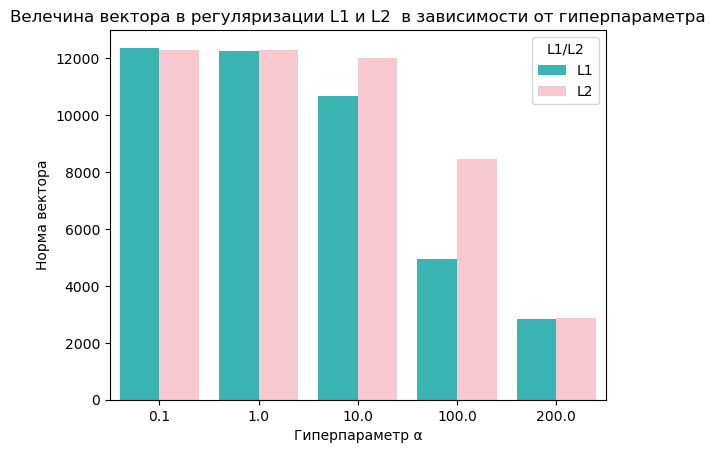

In [816]:
import seaborn as sns
sns.barplot(data=df1, x="alpha", y="norm", hue="L1/L2",  palette=['#24c8c7', 'pink'])
plt.title('Велечина вектора в регуляризации L1 и L2  в зависимости от гиперпараметра')
plt.xlabel('Гиперпараметр α')
plt.ylabel('Норма вектора')
plt.show()

- Как видно из графика регуляризация L1 более агрессивно уменьшает веса, хоть к концу они почти поравнялись.
- Особенностью регрессии LASSO является её склонность занулять большие коэффициенты, из-за чего она часто используется для отбора переменных. Эта склонность определяется значением параметра регуляризации λ, который подбирается с помощью кроссвалидации. Это значит, что для нескольких значений параметра решается задача минимизации функции потерь, а затем наиболее подходящим значением параметра λ принимается то, при котором функция ошибки была наименьшей. [Источник](https://economics.hse.ru/cmf/models_LASSO?ysclid=lfbhvdav6q60455176)

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [832]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=0, alphas=[0.1, 1, 10, 100, 200]).fit(dataH, y)
matrixMSE=reg.mse_path_

ind=np.mean(matrixMSE, axis=1).min()
matrixMean=np.mean(matrixMSE, axis=1).tolist()
alpha=reg.alphas_[matrixMean.index(ind)]
print(f'Наибольшее качество дает alpha={alpha} при MSE={np.mean(matrixMSE, axis=1).min()}')

Наибольшее качество дает alpha=0.1 при MSE=2241896.8314640834


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [833]:


lasso = Lasso(alpha)
l1_select = SelectFromModel(lasso)
X_train_l1 = pd.DataFrame(
    data=l1_select.fit_transform(X_train, y_train),
    columns=X_train.columns[l1_select.get_support()],
)

X_test_l1 = pd.DataFrame(
        data=l1_select.transform(X_test),
        columns=X_test.columns[l1_select.get_support()],
    )

lasso.fit(X_train_l1, y_train)
print(f'Самым неинформативным признаком, который откинула Lasso регресcия оказался: {set(X_train.columns) - set(X_train_l1.columns)}')
p_lasso=lasso.coef_
p_lasso=p_lasso.astype(int)
dfCoefsLasso = pd.DataFrame(columns=['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair' ,'cut_Good', 'cut_Idea', 'cut_Premium', 
                                'color_D' ,'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
                               'clarity_I1' ,'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
                               'clarity_VVS2'])
dfCoefsLasso.loc[len(dfCoefsLasso)]=p_lasso
dfCoefsLasso=dfCoefsLasso.squeeze().sort_values(ascending=False)
print(f'\n\nВсе остальные признаки с параметрами:\n {dfCoefsLasso}')

Самым неинформативным признаком, который откинула Lasso регресcия оказался: {'cut_Very Good'}


Все остальные признаки с параметрами:
 carat           11104
clarity_IF        964
color_D           707
clarity_VVS1      653
clarity_VVS2      587
color_E           527
color_F           470
color_G           257
clarity_VS1       225
cut_Idea           96
cut_Premium        22
y                  -2
table             -29
z                 -55
depth             -65
clarity_VS2       -93
cut_Good         -155
color_H          -234
cut_Fair         -695
clarity_SI1      -695
color_I          -718
x                -930
color_J         -1632
clarity_SI2     -1663
clarity_I1      -4358
Name: 0, dtype: int64


- Самым информативным признаком оказался вес брилиантов, все таки он является решающим
- Почти все признаки качесвта резки оказались оказались не очень информативными
- А вот цвет и прозрачность брилианта более информативные чем качесвто резки

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [835]:
print(f"MSE тестовой выборки после регуляризации L1: {mean_squared_error(y_test, lasso.predict(X_test_l1))}")
print(f'MSE тестовой выборки: {LinMSEtest}')
print("\nЛучше использовать модель с регуляризацией L1") if mean_squared_error(y_test, lasso.predict(X_test_l1))<LinMSEtest else print("\nЛучше использовать обычную линейную регрессию")

MSE тестовой выборки после регуляризации L1: 1259324.9306263272
MSE тестовой выборки: 1259159.1137946646

Лучше использовать обычную линейную регрессию


##### Вывод: 
Модель без L1 регуляризации и без отбора наиболее информативных признаков оказалась более результативной чем с этими факторами. Возможно это произошло из-за одного параметра, который является ключевым в стоимости брилианта, а именно вес. Именно этот параметр является ключевым по которой предсказывается целевая переменная.